

# Project Title : Investigate a Dataset (Gapminder Indicator Datasets)
## Project Subtitle : Exploring the Impact of Child Mortality, Life Expectancy, and Fertility Rates on Future Global Growth.



## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#questions">Research Questions</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>I'll be working with the Gapminder indicator datasets(Child mortality,Life expectancy and Fertility rate) which have been collected and estimated for the years 1800 to 2100 for different countries. <br>
__Child Mortality__ : The death of under-5 year olds <br>
__Life Expectancy__ : The average number of years a person is expected to live in their lifetime.<br>
__Fertility Rate__ : The number of children a woman is able to give birth is expected to give rise to in their lifetime.
>
>In the real world,child mortality can lead to decrease in life expectancy which can lead to decrease in fertility rate too. <br>
>The dependent variables in this datasets are Life expectancy and Fertility while the independent variables are years ,countries and child mortality.

<a id='questions'></a>
## Research Questions

> 1. What country has the lowest fertilty rate in 2022? <br>
> 2. What year/years have the least and most deaths of under-5 year olds recorded? <br>
> 3. What is the number of years a citizen of Nigeria is expected to live in 2023? <br>

In [2]:
#import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [3]:
#load child mortality data
child_mortality = pd.read_csv('child_mortality_0_5_year_olds_dying_per_1000_born.csv')
child_mortality.head(5)

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,469.0,469.0,469.0,469.0,469.0,469.0,470.0,470.0,470.0,...,12.60,12.40,12.20,12.00,11.80,11.60,11.50,11.30,11.10,11.10
1,Angola,486.0,486.0,486.0,486.0,486.0,486.0,486.0,486.0,486.0,...,17.70,17.50,17.30,17.10,17.00,16.80,16.60,16.40,16.30,16.30
2,Albania,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,...,2.32,2.30,2.27,2.24,2.22,2.19,2.16,2.14,2.11,2.11
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.86,0.84,0.83,0.81,0.80,0.79,0.78,0.77,0.76,0.76
4,United Arab Emirates,434.0,434.0,434.0,434.0,434.0,434.0,434.0,434.0,434.0,...,2.31,2.29,2.26,2.24,2.22,2.19,2.17,2.15,2.13,2.13


In [44]:
#declaring a reusable function for getting data information
def datainfo(df):
    df.info() 

In [45]:
#check child mortality data properties
datainfo(child_mortality)   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59297 entries, 0 to 59296
Data columns (total 3 columns):
country            59297 non-null object
Year               59297 non-null object
Child_Mortality    59297 non-null float64
dtypes: float64(1), object(2)
memory usage: 1.4+ MB


In [5]:
#checking for duplicates
sum(child_mortality.duplicated())

0

In [6]:
#sum of missing values in each columns
child_mortality.isna().sum()

country     0
1800       12
1801       12
1802       12
1803       12
           ..
2096        0
2097        0
2098        0
2099        0
2100        0
Length: 302, dtype: int64

In [7]:
#load life expectancy data
life_exp = pd.read_csv('life_expectancy_years.csv')
life_exp.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,28.2,28.2,28.2,28.2,28.2,28.2,28.1,28.1,28.1,...,75.5,75.7,75.8,76.0,76.1,76.2,76.4,76.5,76.6,76.8
1,Angola,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,...,78.8,79.0,79.1,79.2,79.3,79.5,79.6,79.7,79.9,80.0
2,Albania,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,...,87.4,87.5,87.6,87.7,87.8,87.9,88.0,88.2,88.3,88.4
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,United Arab Emirates,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,...,82.4,82.5,82.6,82.7,82.8,82.9,83.0,83.1,83.2,83.3


In [46]:
#check life expectancy data properties
datainfo(life_exp)   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Columns: 302 entries, country to 2100
dtypes: float64(301), object(1)
memory usage: 460.2+ KB


In [9]:
#checking for duplicates
sum(life_exp.duplicated())

0

In [10]:
#sum of missing values in each columns
life_exp.isna().sum()

country    0
1800       9
1801       9
1802       9
1803       9
          ..
2096       9
2097       9
2098       9
2099       9
2100       9
Length: 302, dtype: int64

In [11]:
#load life expectancy data
fertility = pd.read_csv('children_per_woman_total_fertility.csv')
fertility.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Aruba,5.64,5.64,5.64,5.64,5.64,5.64,5.64,5.64,5.64,...,1.82,1.82,1.82,1.82,1.82,1.82,1.82,1.82,1.83,1.83
1,Afghanistan,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,...,1.74,1.74,1.74,1.74,1.74,1.74,1.74,1.74,1.74,1.74
2,Angola,6.93,6.93,6.93,6.93,6.93,6.93,6.93,6.94,6.94,...,2.54,2.52,2.50,2.48,2.47,2.45,2.43,2.42,2.40,2.40
3,Albania,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,...,1.78,1.78,1.78,1.79,1.79,1.79,1.79,1.79,1.79,1.79
4,Netherlands Antilles,5.80,5.80,5.80,5.80,5.80,5.80,5.80,5.80,5.80,...,2.00,2.00,2.01,2.01,2.01,2.01,2.01,2.02,2.02,2.02


In [47]:
#check life expectancy data properties
datainfo(fertility)   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Columns: 302 entries, country to 2100
dtypes: float64(301), object(1)
memory usage: 476.7+ KB


In [13]:
sum(fertility.duplicated())

0

In [15]:
#sum of missing values in each columns
fertility.isna().sum()

country    0
1800       0
1801       0
1802       0
1803       0
          ..
2096       1
2097       1
2098       1
2099       1
2100       1
Length: 302, dtype: int64

### Data Cleaning 

> After loading the three indicator datasets , I noticed they were untidy(the year columns were supposed to be rows),they had missing values.I would be tidying the data by converting the year columns to rows and fill the null values of each indicator with their respective averages

In [28]:
#filling null values with mean/average
means = child_mortality.mean()
child_mortality.fillna(means,inplace = True)

In [34]:
#Converting year columns to rows
child_mortality = pd.melt(child_mortality,id_vars = 'country',var_name = 'Year',value_name = 'Child_Mortality')
child_mortality.head(10)

,country,Year,Child_Mortality
0,Afghanistan,1800,469.000000
1,Angola,1800,486.000000
2,Albania,1800,375.000000
3,Andorra,1800,424.772973
4,United Arab Emirates,1800,434.000000
5,Argentina,1800,402.000000
6,Armenia,1800,371.000000
7,Antigua and Barbuda,1800,474.000000
8,Australia,1800,391.000000
9,Austria,1800,387.000000


In [48]:
#rechecking data information
datainfo(child_mortality)   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59297 entries, 0 to 59296
Data columns (total 3 columns):
country            59297 non-null object
Year               59297 non-null object
Child_Mortality    59297 non-null float64
dtypes: float64(1), object(2)
memory usage: 1.4+ MB


In [42]:
#rechecking data for missing values
sum(child_mortality['Child_Mortality'].isna())

0

In [562]:
#filling null values with mean/average
means = life_exp.mean()
life_exp.fillna(means,inplace = True)

In [563]:
#Converting year columns to rows
life_exp = pd.melt(life_exp,id_vars = 'country',var_name = 'Year',value_name = 'Life_Expectancy')
life_exp.head(10)

,country,Year,Life_Expectancy
0,Afghanistan,1800,28.200000
1,Angola,1800,27.000000
2,Albania,1800,35.400000
3,Andorra,1800,31.503763
4,United Arab Emirates,1800,30.700000
5,Argentina,1800,33.200000
6,Armenia,1800,34.000000
7,Antigua and Barbuda,1800,33.500000
8,Australia,1800,34.000000
9,Austria,1800,34.400000


In [49]:
#rechecking data information
datainfo(life_exp)   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Columns: 302 entries, country to 2100
dtypes: float64(301), object(1)
memory usage: 460.2+ KB


In [565]:
#rechecking data for missing values
sum(life_exp['Life_Expectancy'].isna())

0

In [566]:
#filling null values with mean/average
means = fertility.mean()
fertility.fillna(means,inplace = True)

In [567]:
#Converting year columns to rows
fertility = pd.melt(fertility,id_vars = 'country',var_name = 'Year',value_name = 'Fertility')
fertility.head(10)

,country,Year,Fertility
0,Aruba,1800,5.64
1,Afghanistan,1800,7.00
2,Angola,1800,6.93
3,Albania,1800,4.60
4,Netherlands Antilles,1800,5.80
5,United Arab Emirates,1800,6.94
6,Argentina,1800,6.80
7,Armenia,1800,7.80
8,Antigua and Barbuda,1800,5.00
9,Australia,1800,6.50


In [50]:
#rechecking data information
datainfo(fertility)   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Columns: 302 entries, country to 2100
dtypes: float64(301), object(1)
memory usage: 476.7+ KB


In [569]:
#rechecking data for missing values
sum(fertility['Fertility'].isna())

0

<a id='eda'></a>
## Exploratory Data Analysis


> I would be merging the indicator dataframes into one dataframe for easier data exploration  since they have country and Year columns as their key columns and I would be using an inner join to prevent missing values

In [570]:
#merging child mortality dataframe with life expectancy dataframe at key columns
merged_table1 = child_mortality.merge(life_exp , how = 'inner' , left_on = ['country','Year'],right_on = ['country','Year'])
merged_table1.tail(5)

,country,Year,Child_Mortality,Life_Expectancy
58690,Samoa,2100,3.51,80.8
58691,Yemen,2100,12.60,78.0
58692,South Africa,2100,9.42,77.7
58693,Zambia,2100,11.40,77.1
58694,Zimbabwe,2100,13.70,74.4


In [571]:
#merging child mortality dataframe and life expectancy dataframe merged columns with fertility dataframe at key columns
merged_table2 = merged_table1.merge(fertility , 'inner' , left_on = ['country','Year'],right_on = ['country','Year'])
merged_table2.head()

,country,Year,Child_Mortality,Life_Expectancy,Fertility
0,Afghanistan,1800,469.0,28.2,7.00
1,Angola,1800,486.0,27.0,6.93
2,Albania,1800,375.0,35.4,4.60
3,United Arab Emirates,1800,434.0,30.7,6.94
4,Argentina,1800,402.0,33.2,6.80


In [586]:
#summary statistics
merged_table2.describe()

,Child_Mortality,Life_Expectancy,Fertility
count,55986.000000,55986.000000,55986.000000
mean,215.019636,53.192979,4.501255
std,185.302123,21.366735,2.048081
min,0.250000,1.010000,0.900000
25%,17.000000,32.800000,2.160000
50%,200.000000,49.200000,5.100000
75%,405.000000,74.000000,6.380000
max,756.000000,94.400000,8.870000


In [572]:
#grouping indicators by country with their median values.I used median because 
#it can handle extreme values than the mean/average
stat1 = merged_table2.groupby(['country'],as_index = False)['Child_Mortality','Life_Expectancy','Fertility'].median()
stat1

,country,Child_Mortality,Life_Expectancy,Fertility
0,Afghanistan,416.0,42.3,7.00
1,Albania,280.0,52.2,4.60
2,Algeria,258.0,51.5,6.99
3,Angola,331.0,45.0,6.96
4,Antigua and Barbuda,128.0,58.1,4.47
...,...,...,...,...
181,Venezuela,116.0,58.7,5.57
182,Vietnam,151.0,52.3,4.70
183,Yemen,437.0,31.9,6.88
184,Zambia,247.0,45.2,6.71


Text(0, 0.5, 'Expected number of years to be lived')

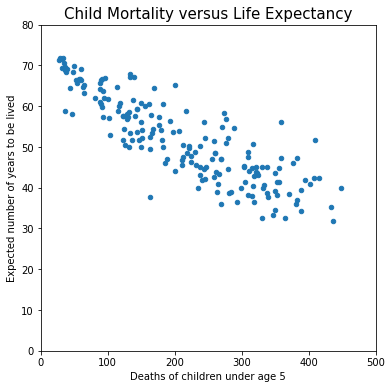

In [585]:
#Plotting the relationship between the Child mortality indicator and the life expectancy indicator
stat1.plot(x = 'Child_Mortality' , y = 'Life_Expectancy',kind = 'scatter',figsize = (6,6))
plt.xlim([0,500])
plt.ylim([0,80])
plt.title('Child Mortality versus Life Expectancy',fontsize = 15)
plt.xlabel('Deaths of children under age 5')
plt.ylabel('Expected number of years to be lived')

> I used a scatterplot above because I wanted to see the direction of the relationship between both variables which is a negative relationship in this case because as the deaths of children under age 5 was increasing,the expected number of years to be lived was decreasing

Text(0, 0.5, 'Number of children born to a woman in a reproductive lifetime')

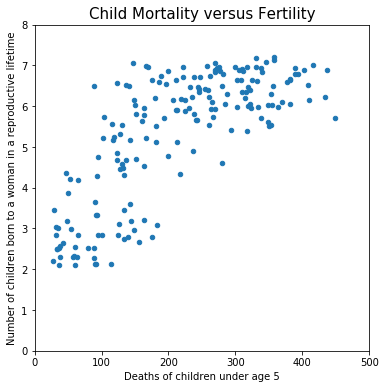

In [584]:
#Plotting the relationship between the Child mortality indicator and the fertility indicator
stat1.plot(x = 'Child_Mortality' , y = 'Fertility',kind = 'scatter',figsize = (6,6))
plt.xlim([0,500])
plt.ylim([0,8])
plt.title('Child Mortality versus Fertility',fontsize = 15)
plt.xlabel('Deaths of children under age 5')
plt.ylabel('Number of children born to a woman in a reproductive lifetime')

> I used a scatterplot above because I wanted to see the direction of the relationship between both variables which is a positive relationship in this case because as the deaths of children under age 5 were increasing,the number of children born by women was increasing

In [575]:
#grouping indicator by diverse years and their median values to plot trends.
stat2 = merged_table2.groupby(['Year'],as_index = False)['Child_Mortality','Life_Expectancy','Fertility'].median()
stat2

,Year,Child_Mortality,Life_Expectancy,Fertility
0,1800,424.000000,31.75,6.175
1,1801,424.000000,31.65,6.175
2,1802,423.254054,31.55,6.175
3,1803,423.048649,31.50,6.175
4,1804,422.859459,31.55,6.175
...,...,...,...,...
296,2096,3.755000,84.60,1.810
297,2097,3.720000,84.70,1.810
298,2098,3.690000,84.80,1.810
299,2099,3.645000,84.90,1.810


Text(0, 0.5, 'Child Mortality')

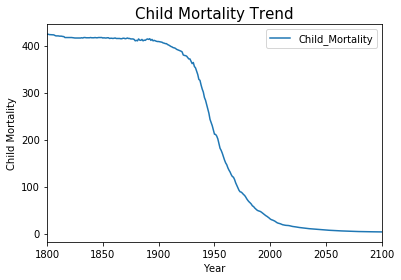

In [576]:
#plotting the trend in child mortality from 1800 to 2100
stat2.plot(x = 'Year' , y = 'Child_Mortality')
plt.title('Child Mortality Trend',fontsize = 15)
plt.xlabel('Year')
plt.ylabel('Child Mortality')

> I used a line chart above because I wanted to see how the deaths of children under age 5 has changed with respect to time(Years)

Text(0, 0.5, 'Life Expectancy')

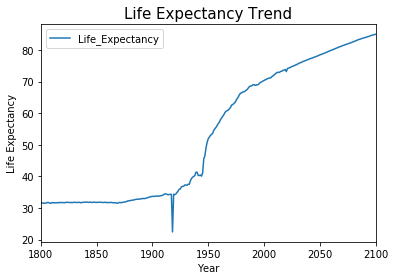

In [577]:
#plotting the trend in life expectancy from 1800 to 2100
stat2.plot(x = 'Year' , y = 'Life_Expectancy')
plt.title('Life Expectancy Trend',fontsize = 15)
plt.xlabel('Year')
plt.ylabel('Life Expectancy')

> I used a line chart above because I wanted to see how the expected number of years to be lived has changed with respect to time(Years)

Text(0, 0.5, 'Fertility')

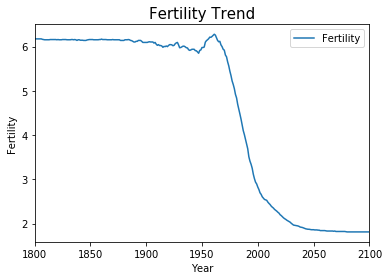

In [578]:
#plotting the trend in fertility from 1800 to 2100
stat2.plot(x = 'Year' , y = 'Fertility')
plt.title('Fertility Trend',fontsize = 15)
plt.xlabel('Year')
plt.ylabel('Fertility')

> I used a line chart above because I wanted to see how the birth of children has changed with respect to time(Years)

### What country has the lowest fertilty rate in 2022? 

In [579]:
#filtering the merged table by year 2022 and the minimum fertility
stat2022 = merged_table2[merged_table['Year'] == '2022'].reset_index().drop(columns = ['index','Child_Mortality','Life_Expectancy'])
minfertility = stat2022['Fertility'].min()
stat2022[stat2022['Fertility'] == minfertility]

,country,Year,Fertility
104,Moldova,2022,1.24


### What year/years have the least and most deaths of under-5 year olds recorded? 

In [580]:
mindeath = merged_table2['Child_Mortality'].min()
maxdeath =  merged_table2['Child_Mortality'].max()

In [581]:
#filtering the merged table by the minimum number of deaths
least = merged_table2[merged_table2['Child_Mortality'] == mindeath].reset_index().drop(columns = ['index','country','Life_Expectancy','Fertility'])
least

,Year,Child_Mortality
0,2099,0.25
1,2100,0.25


In [582]:
#filtering the merged table by the maximum number of deaths
most = merged_table2[merged_table2['Child_Mortality'] == maxdeath].reset_index().drop(columns = ['index','country','Life_Expectancy','Fertility'])
most

,Year,Child_Mortality
0,1902,756.0


### What is the number of years a citizen of Nigeria is expected to live in 2023?

In [583]:
#filtering the merged table by the year 2023 and the country Nigeria
statnig2023 = merged_table2[merged_table['Year'] == '2023'].reset_index().drop(columns = ['index','Child_Mortality','Fertility'])
statnig2023 = statnig2023[statnig2023['country'] == 'Nigeria']
statnig2023

,country,Year,Life_Expectancy
121,Nigeria,2023,65.8


<a id='conclusions'></a>
## Conclusions


> From my analysis,I was able to deduce that the country with the lowest fertility rate in 2022 is Moldova with an estimated fertility rate of 1.24 children. <br>
The year/years that have the least and most deaths of under-5 year olds recorded are 2099 and 2100 with mortality rates of mortality rates of approximately 0.25 deaths and 0.25 deaths respectively. <br>
I also deduced that the number of years a citizen of Nigeria is expected to live in 2023 is estimated to be 65.8years

## Limitations

> 1. I encountered conflict between mean and median usage and I realized that median was more risk-free to use in terms of extreme data points <br>
> 2. I encountered conflict between dropping or filling null values in the datasets so I chose to fill them because the missing data points being dropped could lead to wrong conclusions/analysis

## References

> [Gapminder website](https://www.gapminder.org/data/)